In [2]:
# hide_input

from IPython.core.display import display, HTML, Javascript
from IPython.display import display, Javascript

display(Javascript('''
    var cell = Jupyter.notebook.get_selected_cell();
    cell.element.hide();
'''))

# ----- Notebook Theme -----
color_map = ['#f4a261', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', 
                        '#16a085', '#138d75', '#117a65', '#0e6655', '#e76f51']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\1429800422.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


<IPython.core.display.Javascript object>

# 🔥 EDA 🔥 VKLAB 🔥 
## 🔥 RecSys Case Study 🔥


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1. Read data and Quick view

- view — количество просмотров
- like — количество лайков
- comment — количество комментариев
- hide — количество скрытий
- expand — количество расширений (вероятно, разворачивание поста)
- open_photo — открытие фотографии
- open — общее открытие поста
- share_to_message — количество делений поста через сообщение
- text — текст поста
- photo — ссылка на фото

In [4]:
data = pd.read_csv("../data/dataset.csv")
display(data.head())


,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


## 1.2. Basic statistics

* Примечательно, что данные распределены с большими различиями по диапазону значений: например, минимальные значения по ряду метрик равны нулю, в то время как максимальные довольно высокие (например, 7 млн просмотров или 67834 лайка). Это говорит о сильной вариативности популярности постов.
* Средние значения показывают, что медианный пост получает около 7333 просмотров и 96 лайков, что можно использовать для сравнения с новыми данными или для определения аномалий.
* Стандартное отклонение очень велико для всех метрик, что говорит о разбросе данных.

In [5]:
display(data.describe())

,view,like,comment,hide,expand,open_photo,open,share_to_message
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000
mean,2.017510e+04,382.532580,10.259064,10.739576,780.819697,888.538275,5.957260e+02,55.747907
std,7.954857e+04,1447.320109,70.074167,47.420019,10652.744305,6065.675125,9.374567e+03,288.719215
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.709000e+03,27.000000,0.000000,0.000000,0.000000,49.000000,1.400000e+01,2.000000
50%,7.333000e+03,96.000000,2.000000,2.000000,7.000000,153.000000,5.600000e+01,8.000000
75%,1.659850e+04,305.000000,7.000000,7.000000,224.500000,488.000000,2.360000e+02,31.000000
max,7.010336e+06,67834.000000,5561.000000,2899.000000,987856.000000,440489.000000,1.163508e+06,13328.000000


## 1.3. Data types

In [6]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23527 entries, 0 to 23526
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   view              23527 non-null  int64 
 1   like              23527 non-null  int64 
 2   comment           23527 non-null  int64 
 3   hide              23527 non-null  int64 
 4   expand            23527 non-null  int64 
 5   open_photo        23527 non-null  int64 
 6   open              23527 non-null  int64 
 7   share_to_message  23527 non-null  int64 
 8   text              19322 non-null  object
 9   photo             23527 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.8+ MB


None

## 1.4. Missing values

In [7]:
display(data.isnull().sum())

view                   0
like                   0
comment                0
hide                   0
expand                 0
open_photo             0
open                   0
share_to_message       0
text                4205
photo                  0
dtype: int64

## 2.1 Unique values

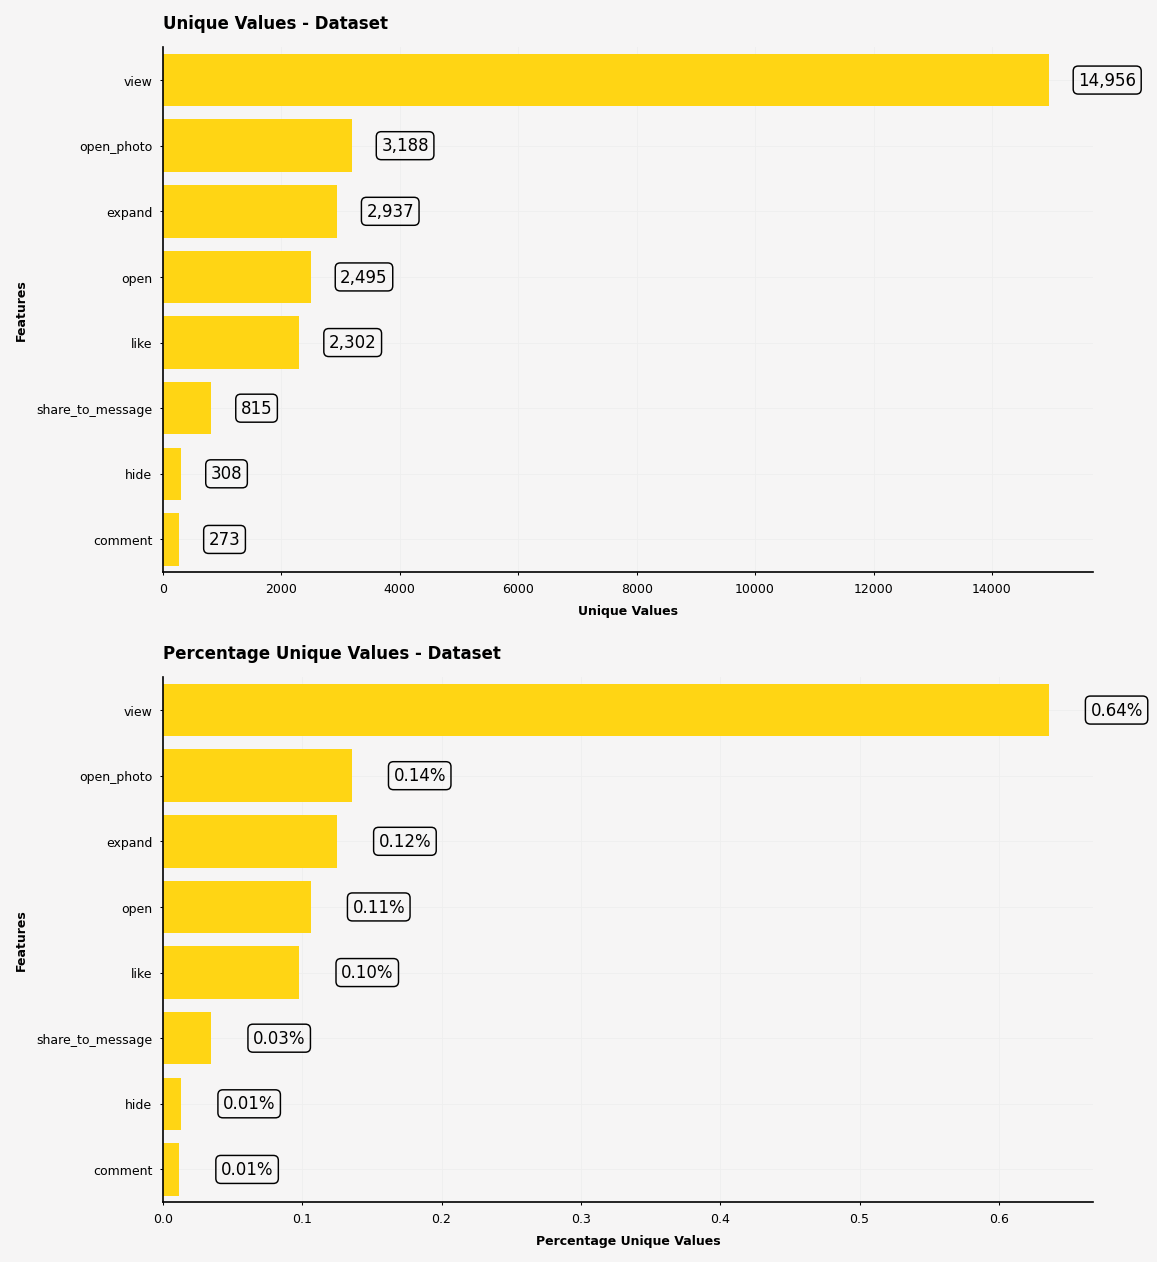

In [8]:
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем количество уникальных значений в тренировочных данных
unique_values_train = pd.DataFrame(data[integer_features].nunique())
unique_values_train = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features', 'Count']
unique_values_train = unique_values_train.sort_values(by='Count', ascending=False)

# Рассчитываем процент уникальных значений относительно размера данных
unique_values_percent_train = pd.DataFrame(data[integer_features].nunique() / data.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']
unique_values_percent_train = unique_values_percent_train.sort_values(by='Count', ascending=False)

# Настройки для построения графиков
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(8, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*int(len(integer_features)))

# График уникальных значений
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values", fontsize=6, weight='bold')
ax0_sns.set_ylabel("Features", fontsize=6, weight='bold')
ax0_sns.tick_params(labelsize=6, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1, 'Unique Values - Dataset', fontsize=8, ha='left', va='top', weight='bold')

# Добавляем текст с метками
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 500
    y = p.get_y() + p.get_height() / 2
    ax0.text(x, y, value, ha='left', va='center', fontsize=8, 
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.7))

# График процента уникальных значений
ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values", fontsize=6, weight='bold')
ax1_sns.set_ylabel("Features", fontsize=6, weight='bold')
ax1_sns.tick_params(labelsize=6, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1, 'Percentage Unique Values - Dataset', fontsize=8, ha='left', va='top', weight='bold')

# Добавляем текст с метками для процента уникальных значений
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2
    ax1.text(x, y, f"{value}%", ha='left', va='center', fontsize=8, 
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.7))

plt.show()


## 2.2. Correlation matrix

1. Высокая корреляция между признаками:
    * view и expand имеют корреляцию 0.78. Это указывает на то, что чем больше просмотров получает пост, тем чаще пользователи его разворачивают, что логично: если пост интересен, люди будут его разворачивать для дальнейшего прочтения.
    * view и hide также имеют довольно высокую корреляцию 0.64. Это может означать, что, несмотря на большое количество просмотров, посты также могут быть скрыты пользователями, возможно, из-за раздражающего или неподходящего контента.
    * expand и open коррелируют на 0.70, что также логично, поскольку развёрнутые посты приводят к более частому открытию их полного содержимого.

2. Средняя корреляция:
    * like и share_to_message имеют корреляцию 0.56. Это указывает на то, что посты, которые получают лайки, также часто делятся через сообщения.
    * like и view коррелируют на 0.58, что также ожидаемо: посты, которые получают много просмотров, скорее всего, будут иметь больше лайков.
    * open и expand — корреляция 0.70, указывает на то, что пользователи, которые разворачивают посты, скорее всего, будут открывать их полностью.

3. Низкая корреляция:
    * comment с остальными признаками имеет относительно низкую корреляцию, что может означать, что комментарии не так сильно зависят от остальных действий пользователей, как просмотры, лайки или разворачивание поста.

4. Возможные выводы и действия:
    * Высокая корреляция между такими признаками, как view, expand, и open, может указывать на то, что они могут нести схожую информацию. Это стоит учитывать при построении моделей — возможно, некоторые признаки можно исключить, чтобы избежать мультиколлинеарности.
    * Признак comment показывает слабую корреляцию с другими метриками, что может свидетельствовать о том, что он отражает другой аспект пользовательского взаимодействия с постом, не зависящий от количества просмотров или лайков.
    * Можно рассмотреть возможность создания новых признаков на основе этих корреляций, чтобы улучшить модели машинного обучения.

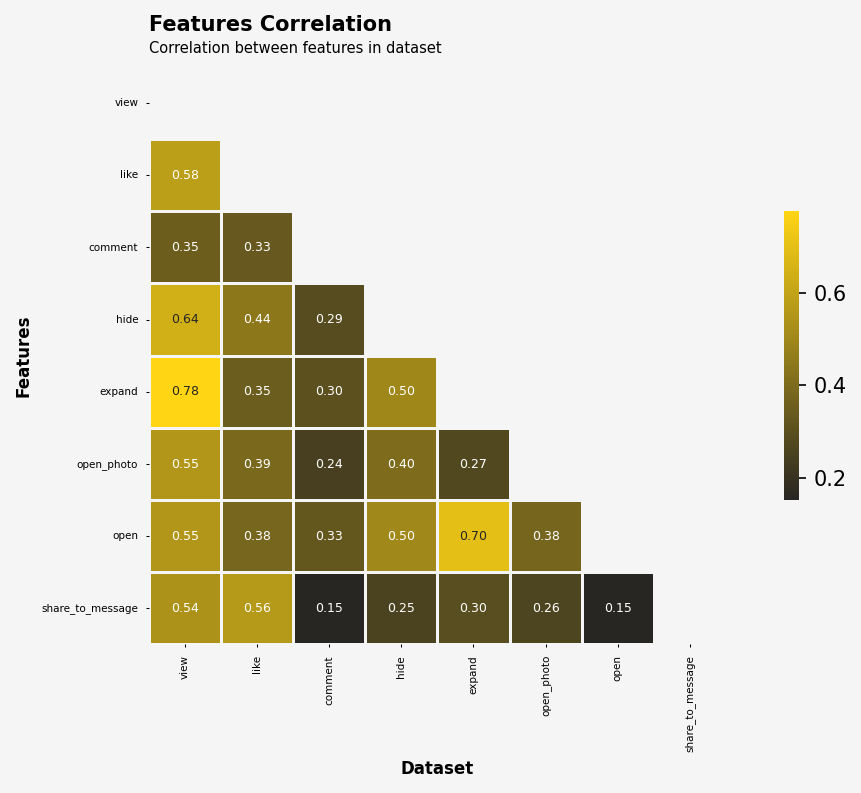

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Подготавливаем числовые фичи
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем корреляции для тренировочных данных
train_corr = data[integer_features].corr()

plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)  # Сетка 1x1, так как у нас только тренировочные данные
gs.update(wspace=0.5, hspace=0)

background_color = "#f6f5f5"
cmap_train = sns.dark_palette('#ffd514', as_cmap=True)

# Маска для треугольной матрицы (чтобы скрыть верхний треугольник)
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Создаем ось для тепловой карты корреляций
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top", "right"]:
    ax0.spines[s].set_visible(False)

# Рисуем тепловую карту корреляций
sns.heatmap(train_corr, ax=ax0, cmap=cmap_train, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize": 6})

# Настройки осей и текста
ax0.tick_params(labelsize=5, width=0.5, length=1.5)
ax0.set_xlabel('Dataset', fontsize=8, fontweight='bold')
ax0.set_ylabel('Features', fontsize=8, fontweight='bold')

# Добавляем заголовок и описание
ax0.text(0, -0.5, 'Features Correlation', fontsize=10, fontweight='bold')
ax0.text(0, -0.2, 'Correlation between features in dataset', fontsize=7)

# Отображение графика
plt.show()


## 2.3. Histogram

Вот несколько комментариев по каждому признаку:

* Все признаки — Пики находятся около нуля, что свидетельствует о большом количестве записей с минимальными значениями, что характерно для таких событий, как просмотры, открытия фото или деление поста.
* Распределение "open", "open_photo", "view" — Видно длинный хвост справа, что указывает на наличие небольшой группы данных с аномально высокими значениями. Это говорит о редких случаях, когда посты получают огромное количество просмотров или взаимодействий.
* Очень малые значения на оси Y — Это означает, что плотность распределения по большинству данных низкая. Пик у нуля и быстрое падение на оси X также говорят о том, что большие значения признаков крайне редки.

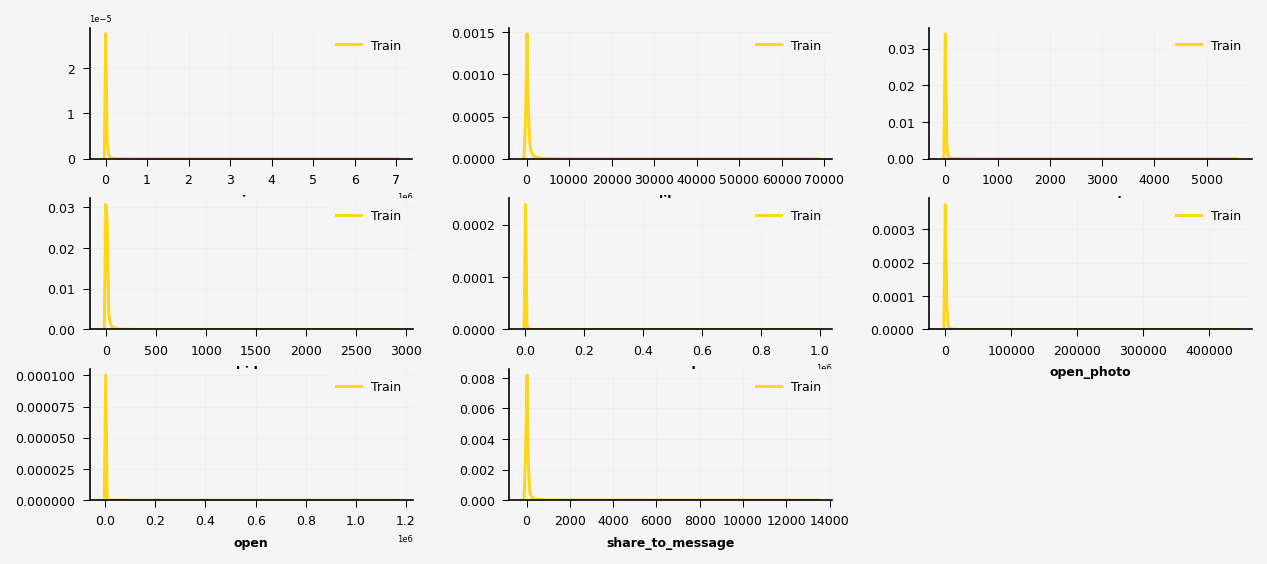

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Устанавливаем DPI для лучшего качества графиков
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(7, 3)  # Создаем сетку 7x3
gs.update(wspace=0.3, hspace=0.3)  # Настройки промежутков между графиками

background_color = '#f6f5f5'
run_no = 0

# Устанавливаем цветовую палитру для графиков
colormap = ['#ffd514', '#ff8826', '#ff355d', '#C70039']

# Подготавливаем числовые фичи
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Инициализация подграфиков
for row in range(0, 7):
    for col in range(0, 3):
        if run_no < len(integer_features):  # Проверяем, чтобы не выйти за пределы количества фич
            locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
            locals()["ax"+str(run_no)].set_facecolor(background_color)
            for s in ["top", "right"]:
                locals()["ax"+str(run_no)].spines[s].set_visible(False)
            run_no += 1  

# Сбрасываем счетчик и строим графики для тренировочных данных
run_no = 0
for col in integer_features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=data[col], zorder=2, alpha=1, linewidth=1.4, color=colormap[0], label='Train')    
    
    # Настройки сетки и подписей осей
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=6, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=6, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)

    # Настройка легенды
    locals()["ax"+str(run_no)].legend(fontsize=6, ncol=3, loc='upper right', facecolor=background_color, edgecolor=background_color)

    run_no += 1

# Отображение графиков
plt.show()


## 2.4. Log transformation Histogram

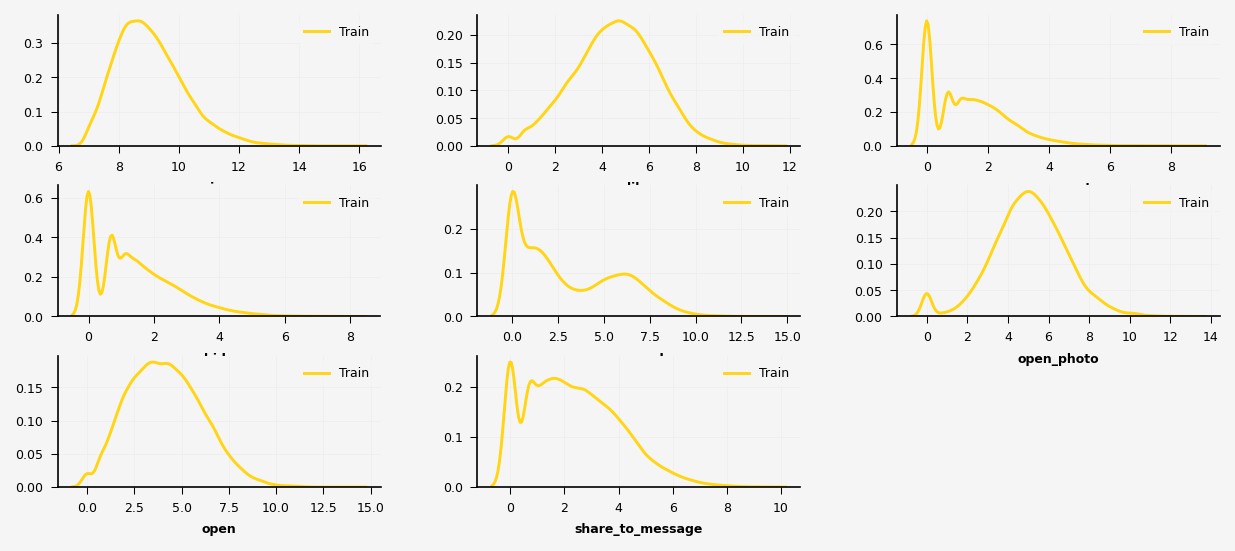

In [11]:
# Применим логарифмическое преобразование ко всем признакам, добавляя 1, чтобы избежать log(0)
data_log = data[integer_features].apply(lambda x: np.log1p(x))

# Визуализируем преобразованные данные
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(7, 3)  # Создаем сетку 7x3
gs.update(wspace=0.3, hspace=0.3)  # Настройки промежутков между графиками

background_color = '#f6f5f5'
run_no = 0

# Устанавливаем цветовую палитру для графиков
colormap = ['#ffd514', '#ff8826', '#ff355d', '#C70039']

# Подготавливаем числовые фичи
integer_features = [col for col in data_log.select_dtypes(include=['int64', 'float64']).columns]

# Инициализация подграфиков
for row in range(0, 7):
    for col in range(0, 3):
        if run_no < len(integer_features):  # Проверяем, чтобы не выйти за пределы количества фич
            locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
            locals()["ax"+str(run_no)].set_facecolor(background_color)
            for s in ["top", "right"]:
                locals()["ax"+str(run_no)].spines[s].set_visible(False)
            run_no += 1  

# Сбрасываем счетчик и строим графики для тренировочных данных
run_no = 0
for col in integer_features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=data_log[col], zorder=2, alpha=1, linewidth=1.4, color=colormap[0], label='Train')    
    
    # Настройки сетки и подписей осей
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=6, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=6, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)

    # Настройка легенды
    locals()["ax"+str(run_no)].legend(fontsize=6, ncol=3, loc='upper right', facecolor=background_color, edgecolor=background_color)

    run_no += 1

# Отображение графиков
plt.show()

## 2.5. Log transformation Correlation matrix

В матрице корреляций можно выделить следующие важные наблюдения:
* Высокая корреляция между view и like (0.60), а также view и hide (0.64). Это говорит о том, что посты с большим количеством просмотров не только получают много лайков, но и могут раздражать некоторых пользователей, что ведет к их скрытию.
* view также сильно коррелирует с open_photo (0.62) и share_to_message (0.64), что указывает на взаимосвязь между популярностью поста и действиями пользователей, такими как открытие фото или пересылка сообщений.

`Стоит обратить внимание на отрицательную корреляцию между like и expand (-0.10), что может свидетельствовать о том, что посты, которые получают много лайков, не всегда требуют разворачивания, или наоборот — разворачиваемые посты могут не получать много лайков.`

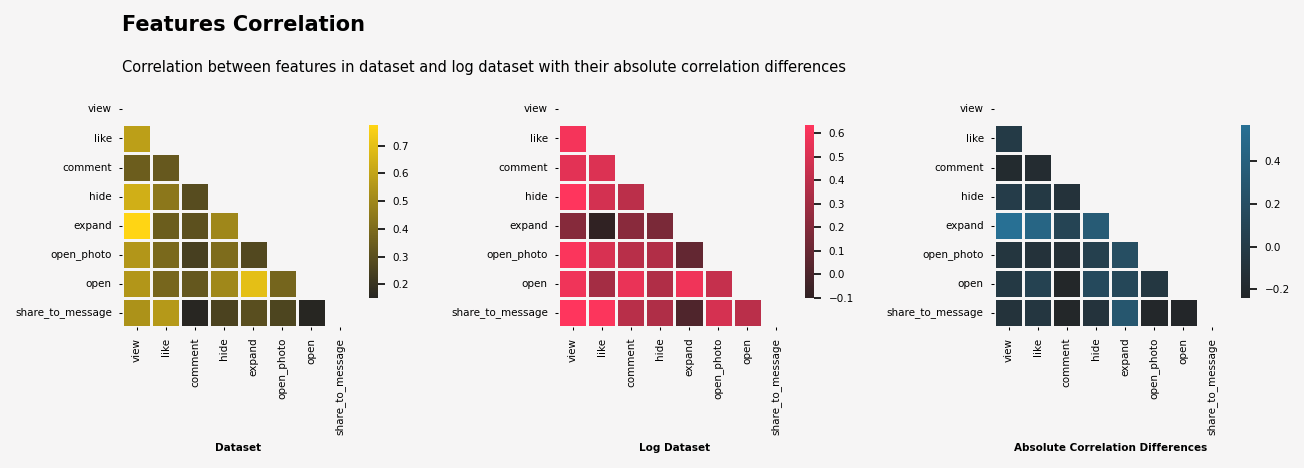

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Подготавливаем числовые фичи
integer_features = [col for col in data_log.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем корреляции для тренировочных данных
train_corr = data[integer_features].corr()
test_corr = data_log[integer_features].corr()
diff_corr = train_corr - test_corr

plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.5, hspace=0)

background_color = "#f6f5f5"
cmap_train = sns.dark_palette('#ffd514', as_cmap=True)
cmap_test = sns.dark_palette('#ff355d', as_cmap=True)
cmap_diff = sns.dark_palette('#287094', as_cmap=True)

mask = np.triu(np.ones_like(train_corr, dtype=bool))

run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
sns.heatmap(train_corr, ax=ax0, cmap=cmap_train, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax0.set_xlabel(col, fontsize=5, fontweight='bold')
ax0.tick_params(labelsize=5, width=0.5, length=1.5)
ax0.set_xlabel('Dataset', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

sns.heatmap(test_corr, ax=ax1, cmap=cmap_test, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax1.set_xlabel(col, fontsize=5, fontweight='bold')
ax1.tick_params(labelsize=5, width=0.5, length=1.5)
ax1.set_xlabel('Log Dataset', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

sns.heatmap(diff_corr, ax=ax2, cmap=cmap_diff, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax2.set_xlabel(col, fontsize=5, fontweight='bold')
ax2.tick_params(labelsize=5, width=0.5, length=1.5)
ax2.set_xlabel('Absolute Correlation Differences', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

ax0.text(0, -2.2, 'Features Correlation', fontsize=10, fontweight='bold')
ax0.text(0, -0.8, 'Correlation between features in dataset and log dataset with their absolute correlation differences', fontsize=7)

plt.show()

## 2.7. Outliers detection

Примечательно, что после логарифмического преобразования количество выбросов значительно сократилось:

Например, для признака view количество выбросов снизилось с 2506 до 369.
Признак expand показывает почти полное устранение выбросов после лог-преобразования (с 3809 до 2 выбросов).

Это подтверждает, что логарифмическое преобразование помогло смягчить влияние редких больших значений и сделать распределение более "нормальным".

In [13]:
# Функция для обнаружения выбросов с помощью межквартильного размаха (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in integer_features:
    outliers = detect_outliers(data, col)
    print(f"Количество выбросов в признаке '{col}': {len(outliers)}")


for col in integer_features:
    outliers = detect_outliers(data_log, col)
    print(f"Количество выбросов в log признаке '{col}': {len(outliers)}")


Количество выбросов в признаке 'view': 2506
Количество выбросов в признаке 'like': 2672
Количество выбросов в признаке 'comment': 2513
Количество выбросов в признаке 'hide': 2817
Количество выбросов в признаке 'expand': 3809
Количество выбросов в признаке 'open_photo': 2881
Количество выбросов в признаке 'open': 3222
Количество выбросов в признаке 'share_to_message': 3015
Количество выбросов в log признаке 'view': 369
Количество выбросов в log признаке 'like': 53
Количество выбросов в log признаке 'comment': 128
Количество выбросов в log признаке 'hide': 164
Количество выбросов в log признаке 'expand': 2
Количество выбросов в log признаке 'open_photo': 812
Количество выбросов в log признаке 'open': 99
Количество выбросов в log признаке 'share_to_message': 156


### Что такое VIF?

VIF показывает, насколько один признак линейно связан с другими признаками. Чем выше значение VIF, тем больше этот признак коррелирует с остальными. Важные пороговые значения для интерпретации VIF:

- **VIF = 1**: Признак не коррелирует с другими предикторами.
- **1 < VIF < 5**: Допустимый уровень корреляции, обычно не вызывает беспокойства.
- **VIF > 5**: Высокая корреляция, возможно, следует рассмотреть удаление этого признака.
- **VIF > 10**: Очень высокая мультиколлинеарность, требуется принять меры (удалить признак или трансформировать данные).

### Интерпретация полученных значений VIF:

- **view (VIF = 6.24)**: Значение VIF выше 5, что указывает на значительную мультиколлинеарность. Это значит, что `view` сильно коррелирует с другими признаками. Можно рассмотреть его удаление или поиск других вариантов обработки данных (например, регуляризация или главные компоненты).

- **like (VIF = 2.01)**: Небольшая корреляция с другими признаками. Значение ниже 5, что не вызывает тревогу.

- **comment (VIF = 1.21)**: Практически отсутствует корреляция с другими предикторами. Никаких проблем.

- **hide (VIF = 1.88)**: Легкая корреляция с другими признаками, но это нормально.

- **expand (VIF = 4.50)**: Находится на грани высокого уровня мультиколлинеарности. Хотя значение ниже 5, стоит следить за этим признаком в модели. Возможно, имеет смысл проверить корреляцию с другими признаками напрямую.

- **open_photo (VIF = 1.76)**: Небольшая корреляция с другими признаками. Не вызывает проблем.

- **open (VIF = 2.47)**: Умеренная корреляция с другими признаками, но в пределах допустимых значений.

- **share_to_message (VIF = 1.80)**: Небольшая корреляция, проблем не вызывает.

### Инсайты:

- Высокий VIF для признака `view` (6.24) указывает на значительную корреляцию с другими признаками. Этот признак может усложнять модель, приводя к нестабильным коэффициентам регрессии. Рекомендуется:
  - Проверить корреляцию `view` с остальными признаками напрямую.
  - Рассмотреть удаление или преобразование этого признака.

- Признак `expand` (VIF = 4.50) также находится близко к порогу высокой мультиколлинеарности, что может вызывать проблемы в дальнейших моделях.

- Признаки `like`, `comment`, `hide`, `open_photo`, `open`, `share_to_message` имеют низкие значения VIF (меньше 5), что говорит о слабой корреляции с другими предикторами и отсутствии мультиколлинеарности.



In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Предположим, что X - это ваши предикторы
# Добавим константу для расчета VIF
X = data[['view', 'like', 'comment', 'hide', 'expand', 'open_photo', 'open', 'share_to_message']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Feature       VIF
0             const  1.126447
1              view  6.243268
2              like  2.008252
3           comment  1.213822
4              hide  1.880342
5            expand  4.501658
6        open_photo  1.764727
7              open  2.468179
8  share_to_message  1.798045


### Интерпретация полученных значений VIF:

1. **const (VIF = 2.31)**:  
   Это константа (сдвиг или пересечение), и значение VIF для неё не является критичным. Оно показывает, что мультиколлинеарность между константой и другими признаками не вызывает беспокойства.

2. **lik2view (VIF = 1.13)**:  
   Низкое значение VIF. Этот признак имеет слабую корреляцию с другими признаками, что говорит о том, что он хорошо независим в модели.

3. **com2view (VIF = 1.05)**:  
   Очень низкий VIF, практически отсутствует корреляция с другими предикторами. Это хороший показатель.

4. **exp2view (VIF = 1.41)**:  
   Небольшая корреляция с другими признаками, но значение ниже 5, что считается допустимым. Проблем с мультиколлинеарностью нет.

5. **op2view (VIF = 1.40)**:  
   Умеренная корреляция, но это не вызывает проблем. Значение ниже 5, что говорит о том, что признак не вносит сильную зависимость в модель.

6. **s2m2view (VIF = 1.06)**:  
   Очень низкое значение VIF, что говорит об отсутствии мультиколлинеарности. Этот признак также независим от остальных.

### Инсайты:

- Все значения VIF значительно ниже 5, что указывает на отсутствие значимой мультиколлинеарности между новыми признаками. Это значит, что признаки, которые вы создали на основе отношения к просмотрам (`view`), имеют независимую информацию и не дублируют друг друга.
- Признаки можно использовать в модели без опасений насчёт корреляции между ними. Вы можете ожидать более стабильные коэффициенты регрессии и, возможно, улучшение интерпретируемости модели.

Эти показатели свидетельствуют о том, что ваши новые признаки корректно сконструированы и внесут полезную информацию в модель.


In [15]:

data['lik2view'] = data['like'] / data['view']
data['com2view'] = data['comment'] / data['view']
data['exp2view'] = data['expand'] / data['view']
data['op2view'] = data['open'] / data['view']
data['s2m2view'] = data['share_to_message'] / data['view']

X = data[['lik2view', 'com2view', 'exp2view', 'op2view', 's2m2view']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Feature       VIF
0     const  2.314081
1  lik2view  1.125249
2  com2view  1.049198
3  exp2view  1.414316
4   op2view  1.402458
5  s2m2view  1.064714


## 3.1 TRAIN & TEST

### Что такое Engagement?

**Engagement** (вовлеченность) — это метрика, которая показывает, насколько пользователи взаимодействуют с контентом или продуктом. В контексте онлайн-платформ, социальных сетей или приложений, engagement измеряет степень активности пользователей. Примеры метрик вовлеченности включают лайки, комментарии, репосты, просмотры, клики и любые другие действия, показывающие интерес пользователей к контенту.

### Основные метрики Engagement:

1. **Просмотры (views)**:  
   Это базовая метрика, показывающая, сколько раз контент был просмотрен. Хотя это ключевой показатель, он не всегда указывает на высокую вовлеченность.

2. **Лайки (likes)**:  
   Лайки показывают, что пользователь положительно оценил контент. Это быстрый и легкий способ взаимодействия, но не всегда показатель глубокой вовлеченности.

3. **Комментарии (comments)**:  
   Комментарии считаются более значимой метрикой, так как требуют больше времени и усилий от пользователя. Высокий уровень комментариев может указывать на высокий уровень интереса и взаимодействия.

4. **Шеры (shares)**:  
   Когда пользователь делится контентом с другими, это часто указывает на высокую степень вовлеченности. Шеры показывают, что контент резонирует с аудиторией настолько, что они хотят показать его другим.

5. **Клики на ссылки (clicks)**:  
   Переход по ссылке — это конкретное действие, которое может показывать интерес пользователя к более глубокому взаимодействию, например, переход на продуктовую страницу или статью.

6. **Открытие фотографий (open_photo)**:  
   Это показывает интерес пользователя к более детальному просмотру визуального контента. Часто рассматривается как более глубокая форма взаимодействия.

### Как измеряется Engagement?

Метрики вовлеченности часто комбинируются для создания более сложных индексов, таких как **engagement rate**. Этот показатель может рассчитываться как процент пользователей, которые взаимодействуют с контентом, от общего числа тех, кто его видел. Например:

- **Engagement Rate = (Лайки + Комментарии + Шеры) / Число просмотров**  

Также можно использовать временные данные, чтобы рассчитать вовлеченность в динамике и понять, как вовлеченность изменяется со временем или в зависимости от определенных действий.

### Почему Engagement важен?

Engagement — это один из ключевых индикаторов успешности контента или продукта. Чем выше вовлеченность, тем сильнее интерес пользователей, а это может привести к следующим результатам:
- **Повышенная лояльность**: Пользователи с высоким уровнем вовлеченности с большей вероятностью будут возвращаться на платформу или продолжать использовать продукт.
- **Увеличение охвата**: Чем больше пользователи взаимодействуют с контентом (например, делятся им), тем больше людей смогут его увидеть.
- **Более точная аналитика**: Метрики вовлеченности помогают лучше понимать потребности и интересы аудитории, что может быть использовано для улучшения стратегии контента или продукта.

В конечном итоге, высокий уровень engagement показывает, что контент или продукт находят отклик у аудитории, что является важным фактором успеха в цифровом мире.

Более подробно ознакомиться с engagement https://t.me/persecond300k/85

In [48]:
# Рассчитаем engagement как сумму всех явных активностей (like, comment, share_to_message)
data['engagement'] = data['like'] + data['comment'] + data['hide'] + data['expand'] + data['open_photo'] + data['share_to_message'] + data['open']

# Рассчитаем целевую переменную: отношение engagement к числу просмотров (view)
data['engagement_conversion'] = data['engagement'] / data['view']
# Заменим возможные NaN (если view = 0) на 0
data['engagement_conversion'] = data['engagement_conversion'].fillna(0)


In [49]:
data.head()

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,lik2view,com2view,exp2view,op2view,s2m2view,engagement,engagement_conversion,log_engagement,log_engagement_conversion
0,10869,185,0,2,0,1947,14,20,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.017021,0.000000,0.000000,0.001288,0.001840,2168,0.199466,7.682022,0.181877
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.024992,0.000110,0.000440,0.002532,0.000220,1222,0.134537,7.109062,0.126225
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004671,0.000934,0.111734,0.021300,0.000747,1188,0.221973,7.080868,0.200467
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.126526,0.001174,0.000235,0.014554,0.005634,772,0.181221,6.650279,0.166548
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.019732,0.000352,0.065363,0.087914,0.000705,1263,0.222516,7.142037,0.200911


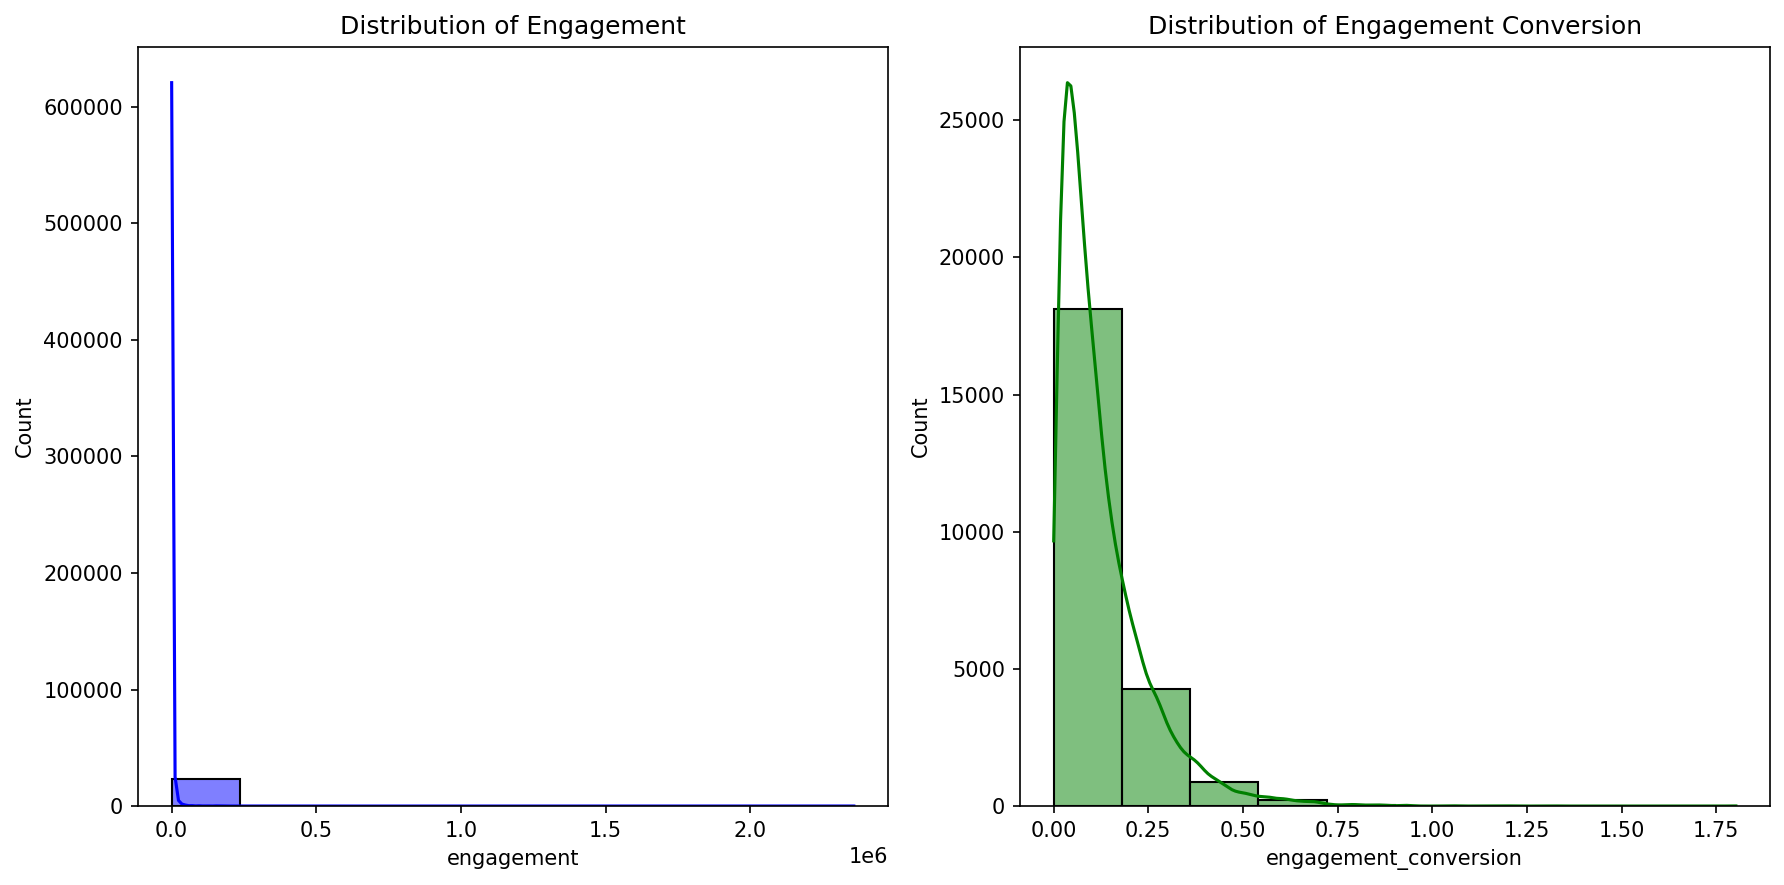

In [20]:
# Рисуем график распределения engagement
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['engagement'], bins=10, kde=True, color='blue')
plt.title('Distribution of Engagement')

# Рисуем график распределения engagement_conversion
plt.subplot(1, 2, 2)
sns.histplot(data['engagement_conversion'], bins=10, kde=True, color='green')
plt.title('Distribution of Engagement Conversion')

plt.tight_layout()
plt.show()

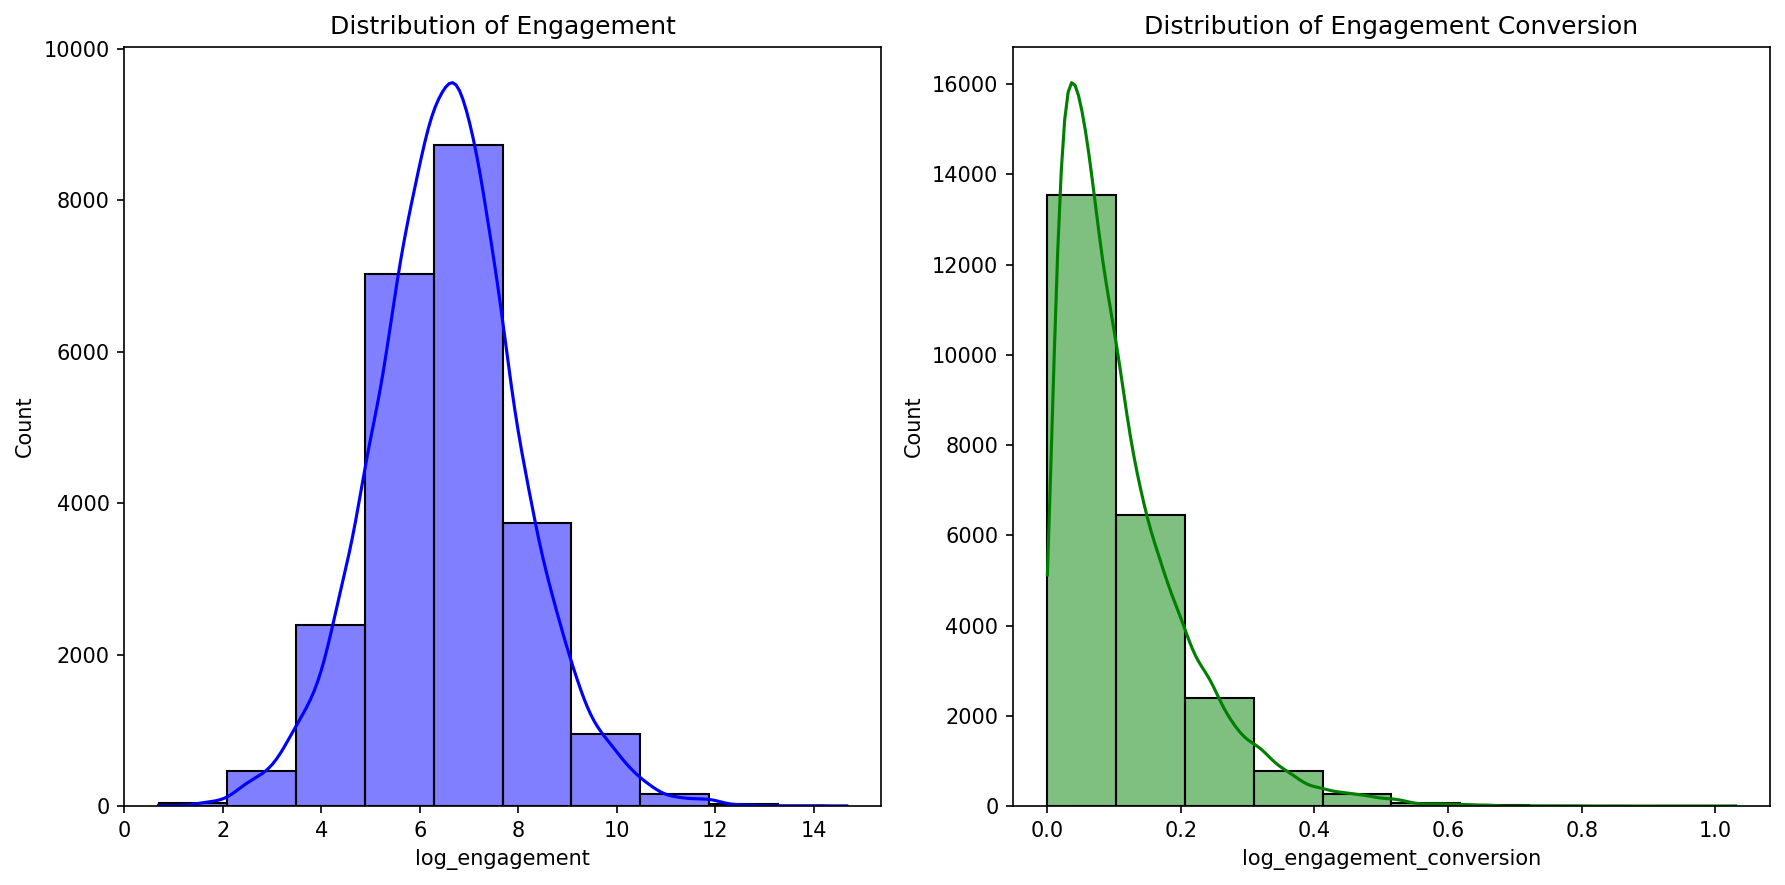

In [21]:
data['log_engagement'] = np.log1p(data['engagement'])
data['log_engagement_conversion'] = np.log1p(data['engagement_conversion'])


# Рисуем график распределения engagement
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['log_engagement'], bins=10, kde=True, color='blue')
plt.title('Distribution of Engagement')

# Рисуем график распределения engagement_conversion
plt.subplot(1, 2, 2)
sns.histplot(data['log_engagement_conversion'], bins=10, kde=True, color='green')
plt.title('Distribution of Engagement Conversion')

plt.tight_layout()
plt.show()

In [22]:
data.head()

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,lik2view,com2view,exp2view,op2view,s2m2view,engagement,engagement_conversion,log_engagement,log_engagement_conversion
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.017021,0.000000,0.000000,0.001288,0.001840,2168,0.199466,7.682022,0.181877
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.024992,0.000110,0.000440,0.002532,0.000220,1222,0.134537,7.109062,0.126225
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.004671,0.000934,0.111734,0.021300,0.000747,1188,0.221973,7.080868,0.200467
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.126526,0.001174,0.000235,0.014554,0.005634,772,0.181221,6.650279,0.166548
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.019732,0.000352,0.065363,0.087914,0.000705,1263,0.222516,7.142037,0.200911


## 3.2 Base обучение моделей

In [23]:
import base64
from io import BytesIO
from PIL import Image
from tqdm import tqdm

# Для обработки текста
from transformers import AutoTokenizer, AutoModel
import torch

# Для обработки изображений
import torchvision.models as models
import torchvision.transforms as transforms

# Для оценки модели
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Для модели CatBoost
from catboost import CatBoostRegressor

## 3.2.1 Bert Embedding

In [25]:
# Выбираем устройство: GPU, если доступно, иначе CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")

# Загрузка токенизатора и модели
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
bert_model = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased')
bert_model.to(device)
bert_model.eval()


Используемое устройство: cpu


c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a Bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [26]:
def get_bert_embeddings(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

In [40]:
# Создадим массив для хранения эмбеддингов
bert_embeddings = []

# Используем tqdm для отображения прогресса
for text in tqdm(data['text'], desc="Извлечение BERT эмбеддингов"):
    if isinstance(text, str):
        embedding = get_bert_embeddings(text, tokenizer, bert_model, device)
        bert_embeddings.append(embedding)
    elif isinstance(text, float):
        # Обработка значений типа float, например, заменяем на пустую строку
        embedding = get_bert_embeddings("", tokenizer, bert_model, device)
        bert_embeddings.append(embedding)
    else:
        print(f"Неверный тип данных: {type(text)}")

# Преобразуем в DataFrame
bert_embeddings = np.array(bert_embeddings)
print(bert_embeddings.shape)  # (количество примеров, размер эмбеддинга)

Извлечение BERT эмбеддингов: 100%|██████████| 23527/23527 [25:50<00:00, 15.17it/s] 


(23527, 1, 768)


In [27]:
# np.save('bert_embeddings.npy', bert_embeddings)
bert_embeddings = np.load('bert_embeddings.npy')
bert_embeddings

array([[[ 0.31837875,  0.42163563, -0.08341527, ..., -0.41650853,
         -0.09591968,  0.4204092 ]],

       [[ 0.14238629, -0.55907506, -0.37409574, ...,  0.46221364,
          0.1094365 ,  0.21304107]],

       [[ 0.21649253, -0.53299546, -0.35998368, ...,  0.2403919 ,
          0.16448334, -0.6835286 ]],

       ...,

       [[ 0.31837875,  0.42163563, -0.08341527, ..., -0.41650853,
         -0.09591968,  0.4204092 ]],

       [[-0.14556515, -0.4079457 ,  0.2443005 , ...,  1.120126  ,
          0.6860941 , -0.17623767]],

       [[-0.19153829,  0.4739936 ,  1.6175693 , ...,  0.5460368 ,
          0.7147915 ,  0.12331193]]], dtype=float32)

## 3.2.2 RESNET Embeddings

In [28]:
# Загрузка ResNet50 предобученной на ImageNet
resnet = models.resnet50(pretrained=True)
resnet = resnet.to(device)
resnet.eval()

# Удаляем последний слой классификации, чтобы получить эмбеддинги
resnet_features = torch.nn.Sequential(*list(resnet.children())[:-1])


c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # Средние значения, использованные при обучении ResNet
        std=[0.229, 0.224, 0.225]    # Стандартные отклонения, использованные при обучении ResNet
    )
])


In [46]:
def get_image_features(base64_string, preprocess, model, device):
    try:
        image = Image.open(BytesIO(base64.b64decode(base64_string))).convert('RGB')
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            features = model(image)
        features = features.squeeze().cpu().numpy()
        return features
    except Exception:
        # В случае ошибки возвращаем нулевой вектор
        return np.zeros(2048)

image_features = []

for img in tqdm(data['photo'], desc="Извлечение признаков изображений"):
    if pd.isnull(img) or img == '':
        # Если изображения нет, добавляем нулевой вектор
        features = np.zeros(2048)
    else:
        features = get_image_features(img, preprocess, resnet_features, device)
    image_features.append(features)

# Преобразуем в массив NumPy
image_features = np.array(image_features).reshape(len(data), -1)
print(image_features.shape)  # (количество примеров, 2048)


Извлечение признаков изображений: 100%|██████████| 23527/23527 [28:11<00:00, 13.91it/s]

(23527, 2048)


In [30]:
# np.save('resnet_embeddings.npy', image_features)
image_features = np.load('resnet_embeddings.npy')
image_features

array([[0.19422244, 0.4278999 , 1.0589708 , ..., 0.29173607, 0.1711447 ,
        0.356794  ],
       [0.8257304 , 0.47951147, 0.06474204, ..., 0.3164103 , 0.09275638,
        0.19392382],
       [0.5345403 , 0.16385871, 0.5183659 , ..., 0.1703676 , 0.05042297,
        0.7139353 ],
       ...,
       [0.08409373, 0.05624849, 0.05146988, ..., 0.03846371, 0.        ,
        0.03032919],
       [0.37008795, 1.1711221 , 0.5167334 , ..., 0.08631483, 0.5024613 ,
        0.18489511],
       [0.82520974, 0.3085805 , 0.19064444, ..., 0.11955865, 0.38926625,
        0.1106735 ]], dtype=float32)

In [47]:
import torch
import clip
import pandas as pd
from tqdm import tqdm

# Загрузка модели и препроцессора
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

# Функция для декодирования изображения из base64 и получения текстовых эмбеддингов
def get_img2text_embedding(base64_string, preprocess, model, device):
    try:
        image = Image.open(BytesIO(base64.b64decode(base64_string))).convert('RGB')
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            features = model.encode_image(image)
        features = features.squeeze().cpu().numpy()
        return features
    except Exception:
        # В случае ошибки возвращаем нулевой вектор
        return np.zeros(512)  # Размер эмбеддингов CLIP

# Извлечение текстовых эмбеддингов из изображений
img2text_embeddings = []

for img in tqdm(data['photo'], desc="Извлечение текстовых эмбеддингов из изображений"):
    if pd.isnull(img) or img == '':
        # Если изображения нет, добавляем нулевой вектор
        features = np.zeros(512)
    else:
        features = get_img2text_embedding(img, clip_preprocess, clip_model, device)
    img2text_embeddings.append(features)

# Преобразуем в массив NumPy
img2text_embeddings = np.array(img2text_embeddings).reshape(len(data), -1)
print(img2text_embeddings.shape)  # (количество примеров, 512)


100%|███████████████████████████████████████| 338M/338M [00:11<00:00, 29.6MiB/s]
Извлечение текстовых эмбеддингов из изображений: 100%|██████████| 23527/23527 [30:00<00:00, 13.07it/s]  

(23527, 512)


In [31]:
# np.save('img2text_embeddings.npy', img2text_embeddings)
img2text_embeddings = np.load('img2text_embeddings.npy')
img2text_embeddings

array([[-0.04467683,  0.01916943, -0.23458615, ...,  1.1424333 ,
        -0.22981814, -0.0657569 ],
       [-0.2335114 , -0.3874194 , -0.11025305, ...,  0.32121798,
         0.1817694 , -0.04885463],
       [-0.21507138, -0.07163171,  0.20673187, ...,  0.44449192,
         0.12736689, -0.14195603],
       ...,
       [-0.36613685,  0.5036684 ,  0.17123972, ...,  0.10729846,
        -0.57824045, -0.19446607],
       [ 0.18085672, -0.35506016, -0.34386832, ...,  0.10894441,
        -0.14987873,  0.5192044 ],
       [ 0.30932117,  0.16015887,  0.25904712, ...,  0.07108821,
        -0.2289811 ,  0.07537387]], dtype=float32)

In [32]:
# Объединение BERT эмбеддингов и признаков изображений
bert_embeddings_2d = bert_embeddings.reshape(bert_embeddings.shape[0], bert_embeddings.shape[2])


In [33]:
import re

# Функция для извлечения признаков из текста
def extract_text_features(text):
    features = {}
    features['text_length'] = len(text)
    features['word_count'] = len(text.split())
    features['char_count'] = sum(len(word) for word in text.split())
    features['sentence_count'] = text.count('.')
    features['avg_word_length'] = features['char_count'] / features['word_count'] if features['word_count'] > 0 else 0
    features['link_count'] = len(re.findall(r'http[s]?://', text))
    features['has_link'] = 1 if features['link_count'] > 0 else 0
    features['special_char_count'] = len(re.findall(r'[^a-zA-Z0-9\s]', text))
    #features['emoji_count'] = len([char for char in text if char in emoji.UNICODE_EMOJI['en']])
    #features['has_emoji'] = 1 if features['emoji_count'] > 0 else 0
    features['uppercase_count'] = sum(1 for char in text if char.isupper())
    features['has_uppercase'] = 1 if features['uppercase_count'] > 0 else 0
    return features

data['text'] = data['text'].fillna("")
# Применение функции к столбцу с текстом
text_features = data['text'].apply(extract_text_features)

# Преобразование списка признаков в DataFrame
text_features_df = pd.DataFrame(list(text_features))
text_features_df
# Объединение DataFrame
# data_combined = pd.concat([data, text_features_df], axis=1)

# print(data_combined.shape)  # (23527, 19 + количество новых признаков)

,text_length,word_count,char_count,sentence_count,avg_word_length,link_count,has_link,special_char_count,uppercase_count,has_uppercase
0,0,0,0,0,0.000000,0,0,0,0,0
1,11,2,10,0,5.000000,0,0,4,0,0
2,307,50,258,2,5.160000,0,0,245,7,1
3,23,2,22,1,11.000000,0,0,22,1,1
4,773,103,671,2,6.514563,0,0,516,36,1
...,...,...,...,...,...,...,...,...,...,...
23522,30,6,25,0,4.166667,0,0,23,1,1
23523,342,45,298,5,6.622222,0,0,198,15,1
23524,0,0,0,0,0.000000,0,0,0,0,0
23525,1742,225,1518,10,6.746667,0,0,1428,72,1


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Вы можете изменить max_features в зависимости от ваших данных
tfidf_embeddings = tfidf_vectorizer.fit_transform(data['text'].fillna('')).toarray()

# Создание DataFrame из TF-IDF эмбеддингов
tfidf_df = pd.DataFrame(tfidf_embeddings, columns=[f'tfidf_{i}' for i in range(tfidf_embeddings.shape[1])])


In [38]:
# Создание DataFrame из bert_embeddings и image_features
bert_df = pd.DataFrame(bert_embeddings_2d, columns=[f'bert_{i}' for i in range(bert_embeddings_2d.shape[1])])
image_df = pd.DataFrame(image_features, columns=[f'image_{i}' for i in range(image_features.shape[1])])
img2text_df = pd.DataFrame(img2text_embeddings, columns=[f'img2text_{i}' for i in range(img2text_embeddings.shape[1])])

In [54]:
# Объединение DataFrame
data_combined = pd.concat([data, bert_df, image_df, img2text_df, text_features_df, tfidf_df], axis=1)
print(data_combined.shape)

(23527, 3457)


In [55]:
data_combined.head()

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,...,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99
0,10869,185,0,2,0,1947,14,20,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.234866,0.0,0.281234,0.348167,0.0,0.0,0.0,0.0,0.0
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [56]:
features = [col for col in data_combined.columns if col not in ['view', 'like', 'comment', 'hide', 'expand', 'open_photo', 'open', 'share_to_message', 'text', 'photo', 'lik2view',
 'com2view',
 'exp2view',
 'op2view',
 's2m2view',
 'engagement',
 'engagement_conversion',
 'log_engagement',
 'log_engagement_conversion',]]

X = data_combined[features].values
y = data_combined['engagement_conversion'].values


(array([1.8113e+04, 4.2540e+03, 8.8200e+02, 2.2200e+02, 4.2000e+01,
        9.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.08130081e-04, 1.80616574e-01, 3.60725018e-01, 5.40833461e-01,
        7.20941905e-01, 9.01050349e-01, 1.08115879e+00, 1.26126724e+00,
        1.44137568e+00, 1.62148412e+00, 1.80159257e+00]),
 <BarContainer object of 10 artists>)

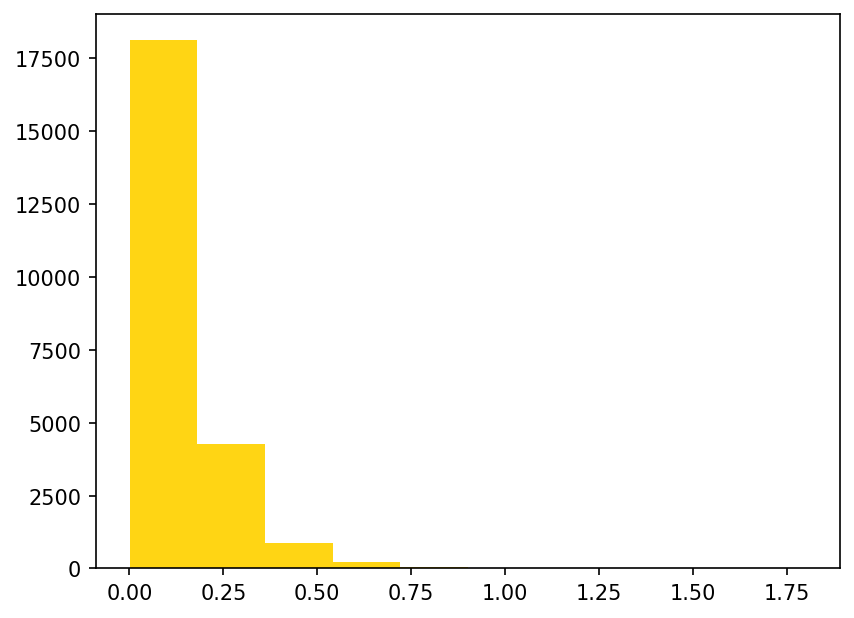

In [57]:
plt.hist(y)

## 3.2.3 CatBoost

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# y_train = y_train.apply(lambda x: min(x, 1))

print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Обучающая выборка: (18821, 3438), Тестовая выборка: (4706, 3438)


In [59]:
# Инициализация модели CatBoostRegressor
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100  # Вывод каждых 100 итераций
)

# Обучение модели
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)


0:	learn: 0.1155610	test: 0.1136141	best: 0.1136141 (0)	total: 805ms	remaining: 13m 24s
100:	learn: 0.0886103	test: 0.0957307	best: 0.0957307 (100)	total: 44.8s	remaining: 6m 38s
200:	learn: 0.0795252	test: 0.0953548	best: 0.0952772 (181)	total: 1m 23s	remaining: 5m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.09527717054
bestIteration = 181

Shrink model to first 182 iterations.


In [60]:
y_pred = model.predict(X_test)

# # Обратное преобразование предсказаний
# y_pred = np.expm1(y_pred_log)
# y_test = np.expm1(y_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MSE: 0.009077739184232343
RMSE: 0.09527717032024169
R² Score: 0.32819397111906


(array([1.000e+00, 1.850e+02, 2.324e+03, 1.722e+03, 3.480e+02, 7.900e+01,
        2.500e+01, 1.700e+01, 2.000e+00, 3.000e+00]),
 array([-0.36821087, -0.24991499, -0.1316191 , -0.01332322,  0.10497266,
         0.22326854,  0.34156442,  0.45986031,  0.57815619,  0.69645207,
         0.81474795]),
 <BarContainer object of 10 artists>)

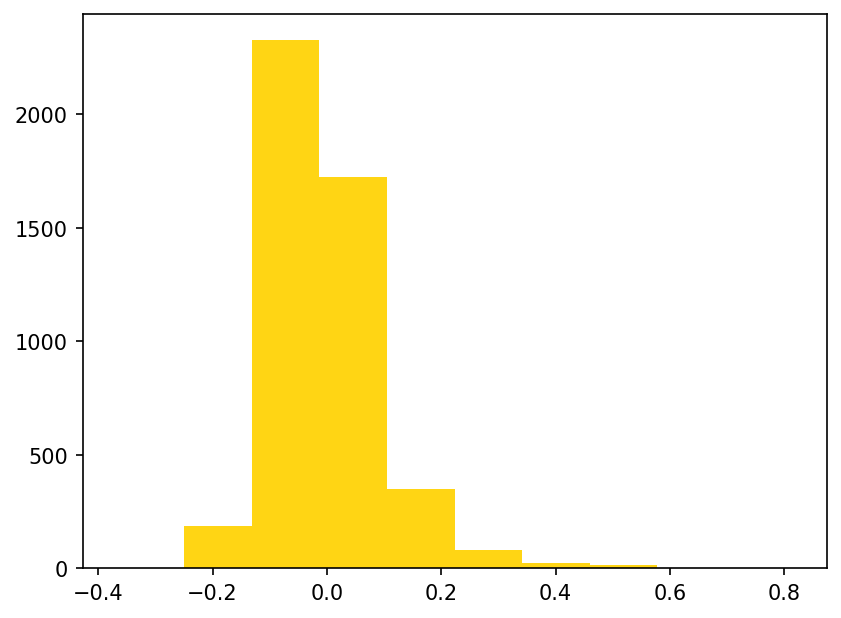

In [62]:
plt.hist(y_test - y_pred)

## Optuna

In [63]:
import optuna


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")

# Функция для оптимизации гиперпараметров с помощью Optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 500, 5000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 9),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 128),
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'random_seed': 42,
        'verbose': 100
    }
    
    model = CatBoostRegressor(**param)
    
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50,
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Создание и запуск исследования Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Вывод лучших параметров
print(f"Лучшие параметры: {study.best_params}")



[I 2024-09-25 18:04:26,993] A new study created in memory with name: no-name-542277c3-28c5-4a41-97bb-ed5be3e0cafc


Обучающая выборка: (18821, 3438), Тестовая выборка: (4706, 3438)


C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\3058352016.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\3058352016.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),


2834, bin=19 score 1.809224176
2807, bin=45 score 5.868534709
3267, bin=59 score 0.2751251764
479, bin=23 score 3.621337517
3402, bin=4 score 2.505356667
2102, bin=50 score 0.9951022691
430, bin=22 score 4.730542165
2553, bin=30 score 0.4668878797

2861, bin=15 score 0.7467135564
2690, bin=34 score 2.299218298
3432, bin=17 score 0.9153387726
664, bin=34 score 3.832102118
3067, bin=2 score 0.8967759304
3328, bin=63 score 3.710086727
262, bin=19 score 1.006194565
3429, bin=8 score 0.6447643673
1007, bin=19 score 2.725719992
206, bin=12 score 5.205345509
3135, bin=34 score 0.8260963828
Object info sizes: 4706 3438
3270, bin=91 score 6.199672135

2861, bin=92 score 0.8531441172
208, bin=22 score 1.071935568
3266, bin=16 score 1.19700389
365, bin=7 score 1.14680162
1547, bin=13 score 0.5778814935


[I 2024-09-25 18:21:25,680] Trial 8 finished with value: 0.09542541067880171 and parameters: {'iterations': 1040, 'learning_rate': 0.08834392078889015, 'depth': 6, 'l2_leaf_reg': 7, 'bagging_temperature': 0.02380481711366722, 'border_count': 122}. Best is trial 2 with value: 0.09483301511507401.
[I 2024-09-25 18:21:25,672] Trial 2 finished with value: 0.09483301511507401 and parameters: {'iterations': 1124, 'learning_rate': 0.056495820090871986, 'depth': 5, 'l2_leaf_reg': 9, 'bagging_temperature': 0.768656687676966, 'border_count': 62}. Best is trial 2 with value: 0.09483301511507401.





597, bin=22 score 1.033555358
3330, bin=56 score 4.041310544
3329, bin=58 score 1.046952109
3340, bin=37 score 0.7638394138
3018, bin=3 score 0.3489988908
2927, bin=14 score 1.205190991
3328, bin=23 score 3.25237388
406, bin=17 score 1.263180514
301, bin=19 score 3.611717318
2663, bin=19 score 1.217514338
585, bin=49 score 1.056028977
3241, bin=48 score 1.275174257


C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\3058352016.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\3058352016.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),


754, bin=33 score 1.414224719
3335, bin=34 score 1.490280754
3427, bin=3 score 0.5735486226
529, bin=9 score 1.033074386
2587, bin=7 score 1.607413358
155, bin=90 score 1.26700319
408, bin=6 score 4.24312124
458, bin=19 score 1.451338526
Object info sizes: 18821 3438


3045, bin=42 score 0.2392108218
323, bin=8 score 1.81445565
2978, bin=24 score 3.758627033
2418, bin=45 score 1.164674978
2838, bin=22 score 4.465271366
1907, bin=5 score 0.279878437
716, bin=10 score 0.8409834116
2829, bin=43 score 0.4535560667
Object info sizes: 18821 3438

3357, bin=2 score 3.816460856
2155, bin=45 score 1.144914037
3210, bin=1 score 0.563331769
459, bin=6 score 0.698142338
2778, bin=34 score 2.187783523
600, bin=52 score 1.440101983
664, bin=58 score 6.476862224
2698, bin=24 score 1.227728619
2387, bin=16 score 0.6819620003
349, bin=43 score 4.678199063
Object info sizes: 4706 3438
2287, bin=12 score 1.341537219
1317, bin=30 score 1.617108548
2274, bin=20 score 2.517608198
698, bin=12 score 4.0538100

[W 2024-09-25 18:22:20,363] Trial 13 failed with parameters: {'iterations': 1046, 'learning_rate': 0.011633820807873249, 'depth': 8, 'l2_leaf_reg': 6, 'bagging_temperature': 0.819828863411822, 'border_count': 108} because of the following error: CatBoostError('bad allocation').
Traceback (most recent call last):
  File "c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\redpo\AppData\Local\Temp\ipykernel_17496\3058352016.py", line 27, in objective
    model.fit(
  File "c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\catboost\core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\red

341, bin=27 score 3.886374907
3333, bin=2 score 0.50894854
503, bin=15 score 1.255128033
212, bin=44 score 0.3474012396
2448, bin=44 score 0.7233625621
3371, bin=28 score 0.6570514502
443, bin=29 score 1.53602494
2968, bin=11 score 8.611465802
1915, bin=10 score 0.8531371138

123, bin=46 score 0.5811077347
2321, bin=10 score 0.8155226315
2868, bin=10 score 3.937053361
3330, bin=31 score 1.656547637

499, bin=16 score 1.84189708
2922, bin=11 score 0.8113134487
3335, bin=37 score 7.512846077
3328, bin=32 score 1.017676397
2141, bin=26 score 1.917619003
1605, bin=50 score 1.058724122

1664, bin=34 score 7.866657523
1074, bin=11 score 0.6617248808
3169, bin=30 score 0.6208084515
1267, bin=29 score 1.386206244
1548, bin=39 score 7.885020025
421, bin=36 score 3.765181392
1863, bin=88 score 0.9374679436
2967, bin=26 score 0.8615319431

185, bin=10 score 2.172324824

2018, bin=0 score 7.970022673
1361, bin=13 score 4.016823555
451, bin=18 score 0.8382753547
164, bin=22 score 0.9649656411
159, 

[I 2024-09-25 18:24:01,374] Trial 3 finished with value: 0.09506954827449497 and parameters: {'iterations': 629, 'learning_rate': 0.028600994119263506, 'depth': 5, 'l2_leaf_reg': 2, 'bagging_temperature': 0.5650233908186235, 'border_count': 52}. Best is trial 2 with value: 0.09483301511507401.


520, bin=38 score 2.163272877

3251, bin=42 score 1.009163105
2835, bin=20 score 1.886731652
3371, bin=33 score 0.9235747075
1122, bin=22 score 1.095703359
451, bin=42 score 0.2625301913
3215, bin=46 score 2.115186438
400, bin=24 score 1.111563542
697, bin=7 score 3.796441922
1152, bin=17 score 1.217773388
2861, bin=100 score 0.4870419025
3420, bin=5 score 1.139903385
2477, bin=18 score 2.43627426
304, bin=85 score 0.7257838005
2440, bin=15 score 2.629490719


1733, bin=50 score 1.371602279
3336, bin=21 score 1.407390468
2649, bin=13 score 1.502613611
1929, bin=17 score 0.9047642083
2927, bin=18 score 1.050532984


3292, bin=7 score 0.7182662101
3382, bin=5 score 0.8409245442
3124, bin=44 score 1.35172301
2349, bin=28 score 1.134515004
3227, bin=42 score 0.2184987131
3187, bin=25 score 0.6149033206
206, bin=15 score 1.476676145
342, bin=41 score 1.468747654
2988, bin=11 score 1.047508628
2875, bin=39 score 0.3942782397
3064, bin=32 score 1.294728017
3095, bin=43 score 0.8263733579
1186

[I 2024-09-25 18:24:56,817] Trial 7 finished with value: 0.09484941516620544 and parameters: {'iterations': 715, 'learning_rate': 0.07544253512741339, 'depth': 6, 'l2_leaf_reg': 5, 'bagging_temperature': 0.1136412686103574, 'border_count': 104}. Best is trial 2 with value: 0.09483301511507401.


398, bin=0 score 1.426114033

1366, bin=30 score 1.532636189
2614, bin=6 score 1.703823241
3127, bin=29 score 1.250255411
2246, bin=25 score 2.039019011


3384, bin=3 score 0.8842731933
2914, bin=43 score 0.2036961594
2716, bin=21 score 1.830041679
3282, bin=34 score 0.6028457841
182, bin=27 score 1.950159105

3292, bin=18 score 1.05441611
2683, bin=24 score 0.3609112969
3336, bin=44 score 0.7858612124
3183, bin=36 score 0.8037277411
1032, bin=10 score 0.4923326117
2078, bin=10 score 1.037476054
777, bin=16 score 2.166020229
698, bin=27 score 1.281530102
3392, bin=1 score 1.036993489
1818, bin=4 score 0.6224122099
615, bin=8 score 1.39233403
1952, bin=5 score 1.267759491
24, bin=27 score 2.459254243

954, bin=30 score 0.7552454557
1172, bin=18 score 2.518707305
1475, bin=24 score 1.686980001

597, bin=13 score 1.522811931
2086, bin=5 score 0.5258486248
226, bin=20 score 0.9158904141
1446, bin=30 score 1.725938792
2519, bin=39 score 0.6348390559
3340, bin=19 score 0.7429640847
1877, bin

In [ ]:
# Обучение модели с лучшими параметрами
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    verbose=100
)

# Предсказание на тестовой выборке
y_pred_log = best_model.predict(X_test)



# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

## 3. PyCaret

In [43]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Инициализация H2O
# h2o.init()
h2o.shutdown(prompt=False)
h2o.init(max_mem_size="4G") 

# Создание H2OFrame из данных
train = h2o.H2OFrame(pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1))
test = h2o.H2OFrame(pd.concat([pd.DataFrame(X_test), pd.Series(y_test, name='target')], axis=1))

# Инициализация H2OAutoML
aml = H2OAutoML(max_runtime_secs=600, seed=42)

# Обучение модели
aml.train(y='target', training_frame=train)

# Предсказание на тестовом наборе
preds = aml.leader.predict(test).as_data_frame()['predict']

# Оценка модели
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Вывод лучшей модели
print(aml.leader)

H2O session _sid_935f closed.
Checking whether there is an H2O instance running at http://localhost:54321.

C:\Users\redpo\AppData\Local\Temp\ipykernel_14912\1802315021.py:8: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


.... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.421-b09, mixed mode)
  Starting server from C:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\redpo\AppData\Local\Temp\tmpbrj18dmw
  JVM stdout: C:\Users\redpo\AppData\Local\Temp\tmpbrj18dmw\h2o_redpo_started_from_python.out
  JVM stderr: C:\Users\redpo\AppData\Local\Temp\tmpbrj18dmw\h2o_redpo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_redpo_gwpl7j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.548 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:41:12.995: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
MSE: 0.006391369440722069
RMSE: 0.07994604080704729
R² Score: 0.2909575439232319
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240925_154053


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  2/2
# GBM base models (used / total)      1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Met

c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\redpo\Desktop\vklab\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
